## Plotting correlation between temperature and polarization



Set fiducial values of cosmological parameters to be set to `CAMB`



In [1]:
params = {
    "ombh2": 0.022, "omch2": 0.12, "H0": 68, "tau": 0.07,
    "As": 2.2e-9, "ns": 0.96,
    "mnu": 0.06, "nnu": 3.046, "num_massive_neutrinos": 1}

Let's put this dictionary of values into `cobaya` internal system of configuration



In [1]:
info = {
    "params": params,
    "likelihood": {"one": None},
    "theory": {"camb": None}
}

We will now get the model given the above parameters



In [1]:
from cobaya.model import get_model
camb_model = get_model(info)

Then set it to retrieve power spectra



In [1]:
lmin, lmax = 2, 2000
camb_model.likelihood.theory.needs(Cl={"tt": lmax, "te": lmax, "ee": lmax})

and compute the CMB power spectra (`ell_factor=True` means normalization by $\ell(\ell+1)/(2\pi)$)



In [1]:
camb_model.logposterior({})
Dls = camb_model.likelihood.theory.get_cl(ell_factor=True)

Finally, let's plot things between $(\ell_\text{min}, \ell_\text{max})$



# Out[30]:
Text(0, 0.5, '$R_{\\rm TT, EE}$')

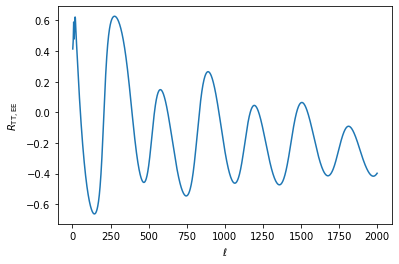

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

l = np.arange(lmin, lmax)
y = (Dls["te"]/np.sqrt(Dls["tt"]*Dls["ee"]))
plt.plot(l, y[lmin:lmax])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$R_{\rm TT, EE}$")

## Plotting dependence to cosmological parameters



In [1]:
def plot_correlation(param_name="H0", amplitude=0.1):
    import matplotlib
    cmap = matplotlib.cm.get_cmap("RdBu_r")

    n = 10
    pars = np.linspace(params[param_name]*(1-amplitude),
                       params[param_name]*(1+amplitude), n)
    for i, p in enumerate(pars):
        from copy import deepcopy
        my_params = deepcopy(params)
        my_params[param_name] = p
        info = {
            "params": my_params,
            "likelihood": {"one": None},
            "theory": {"camb": None}
        }
        from cobaya.model import get_model
        camb_model = get_model(info)
        lmin, lmax = 2, 2000
        camb_model.likelihood.theory.needs(Cl={"tt": lmax, "te": lmax, "ee": lmax})
        camb_model.logposterior({})
        Dls = camb_model.likelihood.theory.get_cl(ell_factor=True)
        l = np.arange(lmin, lmax)
        y = (Dls["te"]/np.sqrt(Dls["tt"]*Dls["ee"]))[lmin:lmax]
        plt.plot(l, y, color=cmap(i/n))
    plt.xlabel(r"$\ell$")
    plt.ylabel(r"$R_{\rm TT, EE}$")
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=pars[0], vmax=pars[-1]))
    latex = {"ombh2": "$\Omega_\mathrm{b}h^2$",
             "omch2": "$\Omega_\mathrm{c}h^2$",
             "H0": "$H_0$ [km/s]",
             "tau": r"$\tau$",
             "As": "$A_\mathrm{s}$",
             "ns": "$n_\mathrm{s}$"}
    plt.colorbar(sm, label=latex[param_name])

### H0



Varying H0 by &plusmn; 10% arrounf its fiducial value



# Out[55]:

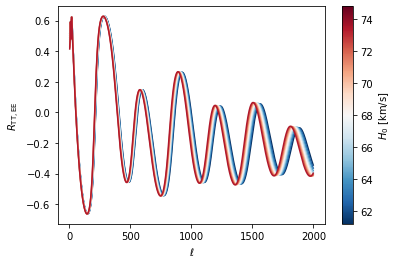

In [1]:
plot_correlation("H0")

### \Omega_{b}h^2



# Out[56]:

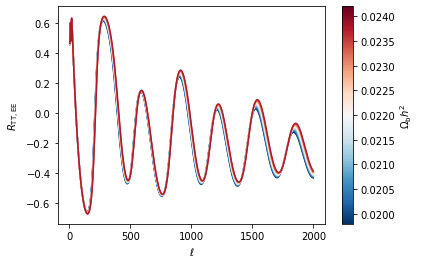

In [1]:
plot_correlation("ombh2")

### \Omega_{c}h^2



# Out[57]:

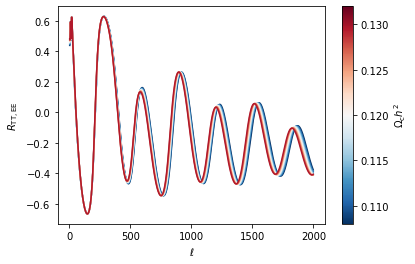

In [1]:
plot_correlation("omch2")

### \tau



# Out[61]:

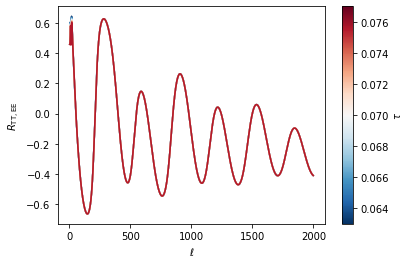

In [1]:
plot_correlation("tau")

### As



# Out[62]:

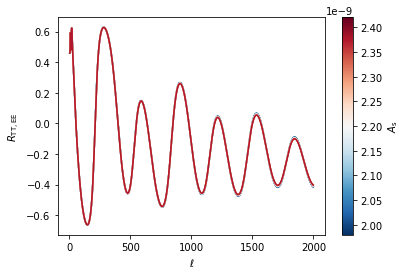

In [1]:
plot_correlation("As")

### ns



# Out[63]:

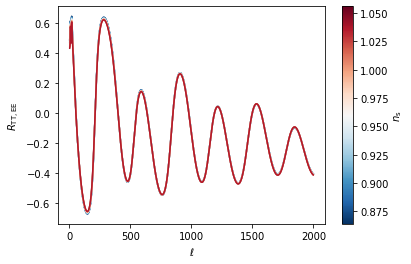

In [1]:
plot_correlation("ns")